In [1]:
#data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import  GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV 

In [6]:
train_df = pd.read_csv('./Titanic/data/train.csv')
test_df = pd.read_csv('./Titanic/data/test.csv')
combine = [train_df,test_df]

In [7]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [11]:
train_df.describe()  #description mention 38% survial rate

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train_df.describe(include=['O']) #train_df.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Johannesen-Bratthammer, Mr. Bernt",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [13]:
train_df.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Johannesen-Bratthammer, Mr. Bernt",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


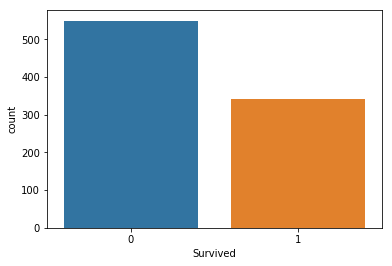

In [14]:
#生存與死亡比例
#死亡的比例是6成、生存的比例大概是4成
sns.countplot(train_df['Survived'])

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


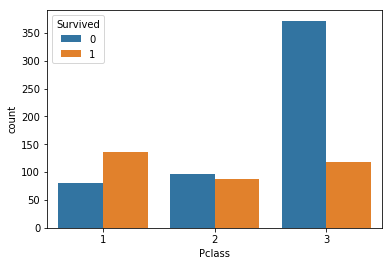

In [15]:
# 艙等跟生存率
#Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). 
# We decide to include this feature in our model.
display(train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False))
# 1艙等的生存率最高、再來是2艙等、最後是3艙等的
sns.countplot(train_df['Pclass'],hue =train_df['Survived'])

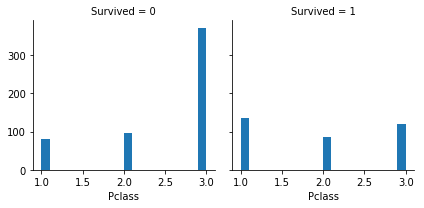

In [16]:
#艙等  用直方圖
g = sns.FacetGrid(train_df,col='Survived')
# col,row,hue参数用于定义绘制数据的子集。由于survived有两个参数，会有两个图
g.map(plt.hist,'Pclass',bins=20)
# hist直方图， ‘Age’为横坐标， bins绘制的直方数量
plt.show() #左图为在Survived=0的子集内，Age和数量的分布图。

,Sex,Survived
0,female,0.742038
1,male,0.188908


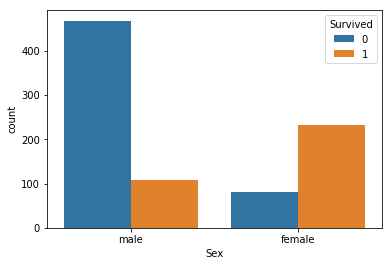

In [17]:
#性別跟生存率
display(train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
#女生生存率是男生的好幾倍。或許是像在電影裡頭一樣，在逃難的時候先讓女生以及小孩先搭船
sns.countplot(train_df['Sex'],hue =train_df['Survived'])

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


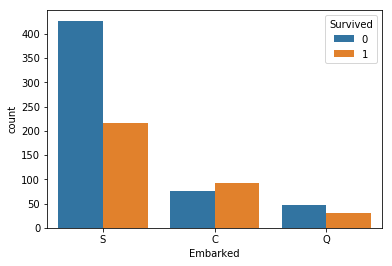

In [18]:
#出發港口 / 存活率
display(train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False))
# S港出發的都比較容易死亡，其原因可能是S城市出發的人買的票價都比較便宜
sns.countplot(train_df['Embarked'],hue =train_df['Survived'])

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


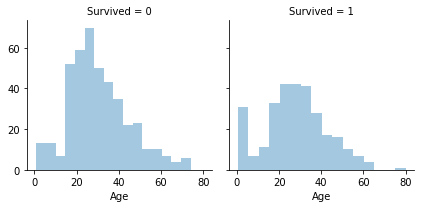

In [19]:
############## 非類別資料 連續性資料
#年齡與生存率
#年齡小的存活比例高出許多
g = sns.FacetGrid(train_df,col='Survived')
g.map(sns.distplot,'Age',kde=False) 
#g.map(sns.distplot,'Age',kde=True) 

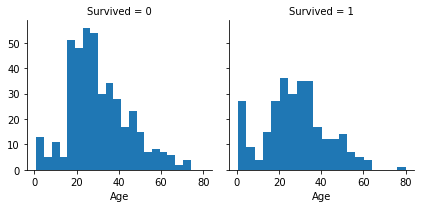

In [20]:
#年齡與生存率  直方圖
g = sns.FacetGrid(train_df,col='Survived',)
# col,row,hue参数用于定义绘制数据的子集。由于survived有两个参数，会有两个图
g.map(plt.hist,'Age',bins=20)
# hist直方图， ‘Age’为横坐标， bins绘制的直方数量
plt.show() #左图为在Survived=0的子集内，Age和数量的分布图。

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


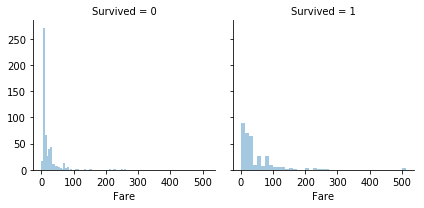

In [21]:
#票價與生存率   票價低的乘客死亡率較高
g = sns.FacetGrid(train_df,col='Survived')
g.map(sns.distplot,'Fare',kde=False) 
#g.map(sns.distplot,'Fare',kde=True) 

In [22]:
#父母＋小孩的數量和存活率
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


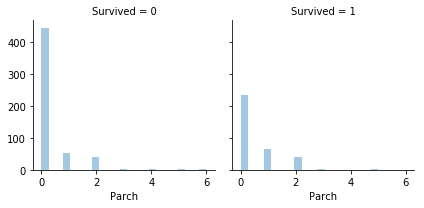

In [23]:
#沒有父母小孩一起的生存率比起有跟父母小孩來的低
g = sns.FacetGrid(train_df,col='Survived')
g.map(sns.distplot,'Parch',kde=False) 
#g.map(sns.distplot,'Parch',kde=True) 

In [24]:
#兄弟姊妹 和生存率
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


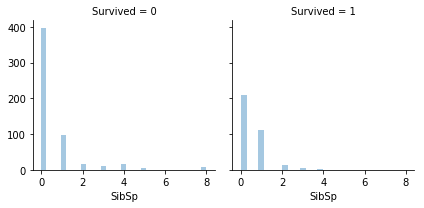

In [25]:
#沒有沒有帶兄弟姊妹＋丈夫妻子一起來的生存率比起有跟兄弟姊妹＋丈夫妻子來的低
g = sns.FacetGrid(train_df,col='Survived')
g.map(sns.distplot,'SibSp',kde=False) 
#g.map(sns.distplot,'SibSp',kde=True) 

In [26]:
#“父母＋小孩”加上“兄弟姊妹＋丈夫妻子”的數量變成一個新的欄位叫做家庭大小
#Create new feature combining existing features
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


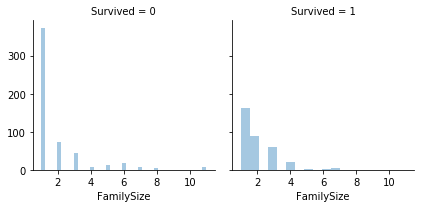

In [27]:
g = sns.FacetGrid(train_df,col='Survived')
g.map(sns.distplot,'FamilySize',kde=False) 
#g.map(sns.distplot,'SibSp',kde=True) 

In [28]:
#特徵工程

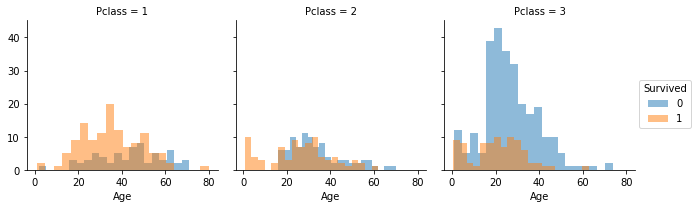

In [29]:
grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
# hue参数的把两个直方图画在同一张图上，其中有size参数决定高度，aspect长宽比，width=size*aspect
#grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()  # 将hue标签显示在图上
plt.show()

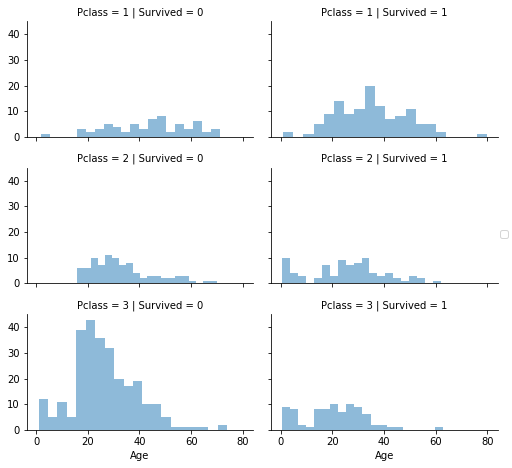

In [92]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()  # 将hue标签显示在图上
plt.show() 

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


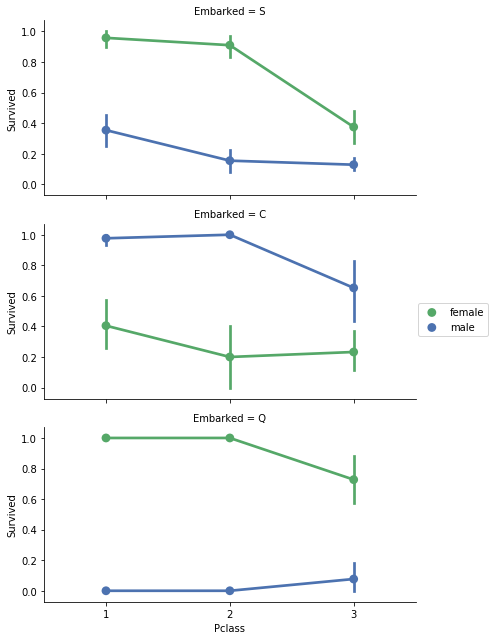

In [93]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=3, aspect=2)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()
plt.show() 

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


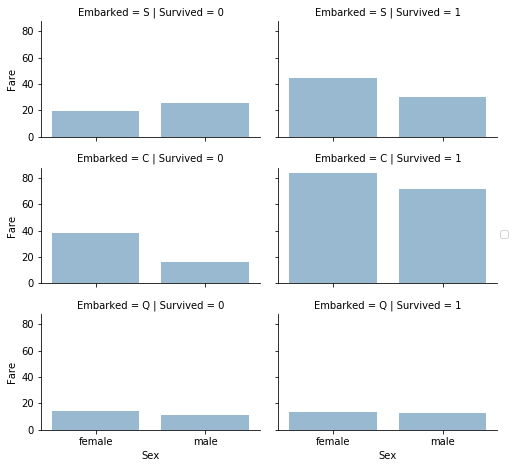

In [94]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [95]:
#Correcting by dropping features
print("Before", train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

train_df = train_df.drop(['Ticket','Cabin'],axis=1)
test_df = test_df.drop(['Ticket','Cabin'],axis=1)
combine = [train_df,test_df]

print("After", train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)


Before (891, 13) (418, 12) (891, 13) (418, 12)
After (891, 11) (418, 10) (891, 11) (418, 10)


In [96]:
# retain the new Title feature for model training. 增加新的feature
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [97]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [98]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)



In [99]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,5,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,3,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,2,3


In [100]:
#Drop Name, PassengerId
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 10), (418, 10))

In [101]:
#converting Sex feature to a new feature
for dataset in combine:
    dataset['Gender'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [102]:
train_df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,Gender
0,0,3,male,22.0,1,0,7.2500,S,2,1,0
1,1,1,female,38.0,1,0,71.2833,C,2,3,1
2,1,3,female,26.0,0,0,7.9250,S,1,2,1
3,1,1,female,35.0,1,0,53.1000,S,2,3,1
4,0,3,male,35.0,0,0,8.0500,S,1,1,0
5,0,3,male,NaN,0,0,8.4583,Q,1,1,0
6,0,1,male,54.0,0,0,51.8625,S,1,1,0
7,0,3,male,2.0,3,1,21.0750,S,5,4,0
8,1,3,female,27.0,0,2,11.1333,S,3,3,1
9,1,2,female,14.0,1,0,30.0708,C,2,3,1


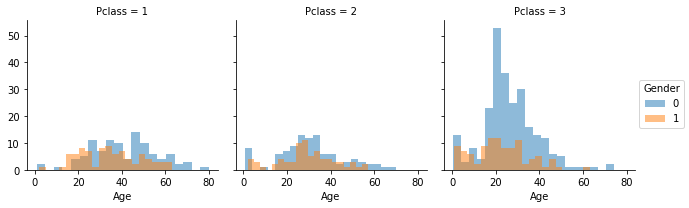

In [103]:
 grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
#grid = sns.FacetGrid(train_df, row='Pclass', col='Gender', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.show()

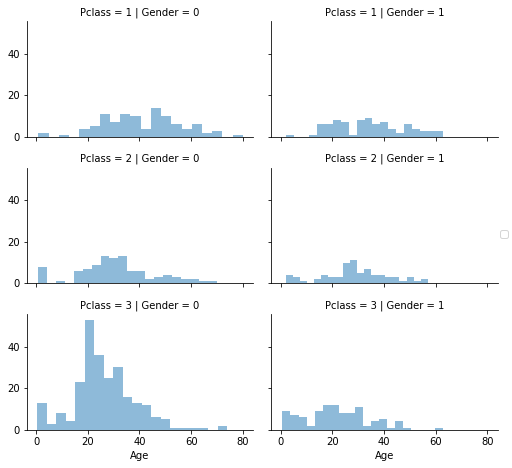

In [104]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Gender', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.show()

In [105]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [106]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Gender'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            print(dataset['Age'], " ...... " , guess_ages[i,j] )
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Gender == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
            
    dataset['Age'] = dataset['Age'].astype(int)

train_df.head(20)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64  ......  40.0
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,Gender
0,0,3,male,22,1,0,7.2500,S,2,1,0
1,1,1,female,38,1,0,71.2833,C,2,3,1
2,1,3,female,26,0,0,7.9250,S,1,2,1
3,1,1,female,35,1,0,53.1000,S,2,3,1
4,0,3,male,35,0,0,8.0500,S,1,1,0
5,0,3,male,25,0,0,8.4583,Q,1,1,0
6,0,1,male,54,0,0,51.8625,S,1,1,0
7,0,3,male,2,3,1,21.0750,S,5,4,0
8,1,3,female,27,0,2,11.1333,S,3,3,1
9,1,2,female,14,1,0,30.0708,C,2,3,1


In [107]:
#create Age bands and determine correlations with Survived.
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [108]:
#replace Age with ordinals based on these bands.
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,Gender,AgeBand
0,0,3,male,1,1,0,7.2500,S,2,1,0,"(16.0, 32.0]"
1,1,1,female,2,1,0,71.2833,C,2,3,1,"(32.0, 48.0]"
2,1,3,female,1,0,0,7.9250,S,1,2,1,"(16.0, 32.0]"
3,1,1,female,2,1,0,53.1000,S,2,3,1,"(32.0, 48.0]"
4,0,3,male,2,0,0,8.0500,S,1,1,0,"(32.0, 48.0]"
5,0,3,male,1,0,0,8.4583,Q,1,1,0,"(16.0, 32.0]"
6,0,1,male,3,0,0,51.8625,S,1,1,0,"(48.0, 64.0]"
7,0,3,male,0,3,1,21.0750,S,5,4,0,"(-0.08, 16.0]"
8,1,3,female,1,0,2,11.1333,S,3,3,1,"(16.0, 32.0]"
9,1,2,female,0,1,0,30.0708,C,2,3,1,"(-0.08, 16.0]"


In [109]:
#drop AgeBand
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,Gender
0,0,3,male,1,1,0,7.2500,S,2,1,0
1,1,1,female,2,1,0,71.2833,C,2,3,1
2,1,3,female,1,0,0,7.9250,S,1,2,1
3,1,1,female,2,1,0,53.1000,S,2,3,1
4,0,3,male,2,0,0,8.0500,S,1,1,0


In [110]:
#create another feature called IsAlone.
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [111]:
# drop Parch, SibSp, and FamilySize features in favor of IsAlone.
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Gender,IsAlone
0,0,3,male,1,7.2500,S,1,0,0
1,1,1,female,2,71.2833,C,3,1,0
2,1,3,female,1,7.9250,S,2,1,1
3,1,1,female,2,53.1000,S,3,1,0
4,0,3,male,2,8.0500,S,1,0,1


In [112]:
# create an artificial feature combining Pclass and Age.
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(20)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [113]:
#Embarked feature takes S, Q, C values based on port of embarkation. 
#Our training dataset has two missing values. We simply fill these with the most common occurance.
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [114]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [115]:
#convert the EmbarkedFill feature by creating a new numeric Port feature.
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [116]:
train_df.head(20)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Gender,IsAlone,Age*Class
0,0,3,male,1,7.2500,0,1,0,0,3
1,1,1,female,2,71.2833,1,3,1,0,2
2,1,3,female,1,7.9250,0,2,1,1,3
3,1,1,female,2,53.1000,0,3,1,0,2
4,0,3,male,2,8.0500,0,1,0,1,6
5,0,3,male,1,8.4583,2,1,0,1,3
6,0,1,male,3,51.8625,0,1,0,1,3
7,0,3,male,0,21.0750,0,4,0,0,0
8,1,3,female,1,11.1333,0,3,1,0,3
9,1,2,female,0,30.0708,1,3,1,0,0


In [117]:
 #complete the Fare feature for single missing value in test dataset using mode to get the value 
#that occurs most frequently for this feature. We do this in a single line of code.
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Gender,IsAlone,Age*Class
0,892,3,male,2,7.8292,2,1,0,1,6
1,893,3,female,2,7.0000,0,3,1,0,6
2,894,2,male,3,9.6875,2,1,0,1,6
3,895,3,male,1,8.6625,0,1,0,1,3
4,896,3,female,1,12.2875,0,3,1,0,3


In [118]:
#create FareBand.
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [119]:
#Convert the Fare feature to ordinal values based on the FareBand.
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Gender,IsAlone,Age*Class
0,0,3,male,1,0,0,1,0,0,3
1,1,1,female,2,3,1,3,1,0,2
2,1,3,female,1,1,0,2,1,1,3
3,1,1,female,2,3,0,3,1,0,2
4,0,3,male,2,1,0,1,0,1,6
5,0,3,male,1,1,2,1,0,1,3
6,0,1,male,3,3,0,1,0,1,3
7,0,3,male,0,2,0,4,0,0,0
8,1,3,female,1,1,0,3,1,0,3
9,1,2,female,0,2,1,3,1,0,0


In [120]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Gender,IsAlone,Age*Class
0,892,3,male,2,0,2,1,0,1,6
1,893,3,female,2,0,0,3,1,0,6
2,894,2,male,3,1,2,1,0,1,6
3,895,3,male,1,1,0,1,0,1,3
4,896,3,female,1,1,0,3,1,0,3
5,897,3,male,0,1,0,1,0,1,0
6,898,3,female,1,0,2,2,1,1,3
7,899,2,male,1,2,0,1,0,0,2
8,900,3,female,1,0,1,3,1,1,3
9,901,3,male,1,2,0,1,0,0,3


In [121]:
#Model, Predict and Solve
X_train = train_df.drop(["Survived",'Sex'], axis=1)
y_train = train_df["Survived"]
X_test  = test_df.drop(["PassengerId",'Sex'], axis=1).copy()
X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [122]:
X_train.head(10)

,Pclass,Age,Fare,Embarked,Title,Gender,IsAlone,Age*Class
0,3,1,0,0,1,0,0,3
1,1,2,3,1,3,1,0,2
2,3,1,1,0,2,1,1,3
3,1,2,3,0,3,1,0,2
4,3,2,1,0,1,0,1,6
5,3,1,1,2,1,0,1,3
6,1,3,3,0,1,0,1,3
7,3,0,2,0,4,0,0,0
8,3,1,1,0,3,1,0,3
9,2,0,2,1,3,1,0,0


In [123]:
y_train.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [124]:
X_test.head(10)

,Pclass,Age,Fare,Embarked,Title,Gender,IsAlone,Age*Class
0,3,2,0,2,1,0,1,6
1,3,2,0,0,3,1,0,6
2,2,3,1,2,1,0,1,6
3,3,1,1,0,1,0,1,3
4,3,1,1,0,3,1,0,3
5,3,0,1,0,1,0,1,0
6,3,1,0,2,2,1,1,3
7,2,1,2,0,1,0,0,2
8,3,1,0,1,3,1,1,3
9,3,1,2,0,1,0,0,3


In [125]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc_log = round(lr.score(X_train, y_train) * 100, 2)
acc_log

80.36

In [126]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df

,0
0,Pclass
1,Sex
2,Age
3,Fare
4,Embarked
5,Title
6,Gender
7,IsAlone
8,Age*Class


In [127]:
coeff_df.columns = ['Feature']

In [128]:
coeff_df

,Feature
0,Pclass
1,Sex
2,Age
3,Fare
4,Embarked
5,Title
6,Gender
7,IsAlone
8,Age*Class


In [129]:
#與範例結果不同
coeff_df['Correlation'] = pd.Series(lr.coef_[0])
coeff_df.sort_values(by='Correlation',ascending=False)

,Feature,Correlation
5,Title,2.201527
4,Embarked,0.398234
1,Sex,0.287164
3,Fare,0.261762
6,Gender,0.129140
2,Age,-0.085150
7,IsAlone,-0.311200
0,Pclass,-0.749006
8,Age*Class,NaN


In [130]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

83.84

In [131]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

84.74

In [132]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

72.28

In [133]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


78.0

In [134]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

79.12

In [135]:
# Stochastic Gradient Descent   與範例不同

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


72.84

In [136]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

86.76

In [141]:
 rf = RandomForestClassifier(oob_score=True, random_state=1, n_jobs=-1)
 param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16, 20], "n_estimators": [50, 100, 400, 700, 1000]}
 gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

 gs = gs.fit(X_train, y_train)

 print(gs.best_score_)
 print(gs.best_params_) 

0.8170594837261503
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [148]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

86.76

In [149]:
X_train.columns

Index(['Pclass', 'Age', 'Fare', 'Embarked', 'Title', 'Gender', 'IsAlone',
       'Age*Class'],
      dtype='object')

In [150]:
pd.concat((pd.DataFrame(X_train.columns, columns = ['variable']), 
           pd.DataFrame(random_forest.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
4,Title,0.241950
5,Gender,0.234507
0,Pclass,0.134020
2,Fare,0.132236
7,Age*Class,0.098004
3,Embarked,0.069887
1,Age,0.051404
6,IsAlone,0.037991


In [151]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
0,Support Vector Machines,83.84
2,Logistic Regression,80.36
7,Linear SVC,79.12
5,Perceptron,78.00
6,Stochastic Gradient Decent,72.84
4,Naive Bayes,72.28


In [152]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_pred
    })
 

In [153]:
submission.to_csv('Submit2.csv',index=0)

In [ ]:
#Kaggle score : 0.77511